# Title:Soils Yield Prediction

Input: Dataset containing various soil quality based parameters like nitrogen, pottasium, phosphorus, temperature, humidity, pH, rainfall etc.

Output: Suggesting 3 best suitable crops which can be grown on particular type of soil    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting Basic Info


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.shape

(2200, 8)

In [3]:
crop["label"].nunique()

22

In [4]:
crop["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
crop.describe()

,N,P,K,temperature,humidity,pH,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
pH             0
rainfall       0
label          0
dtype: int64

### SHOWING THE UNIQUE VALUES GRPAHICALLY

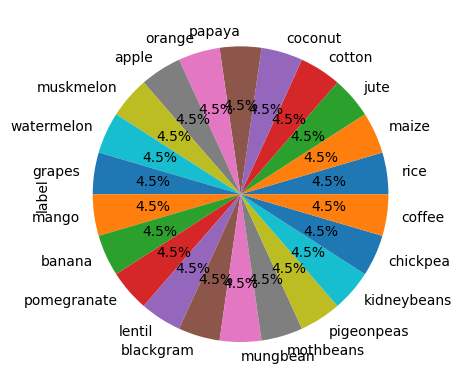

In [8]:
crop['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()


### SEPERATING THE X AND Y VALUES

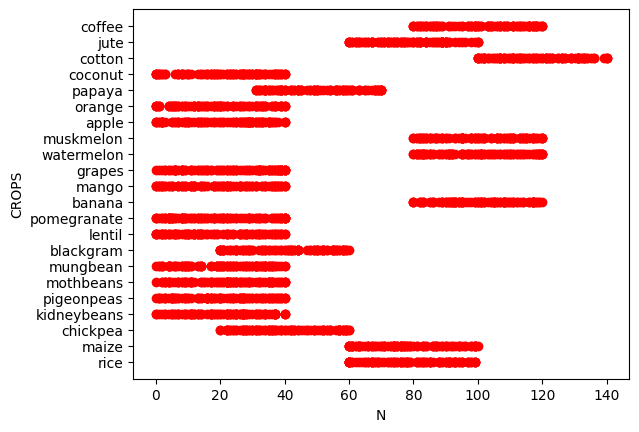

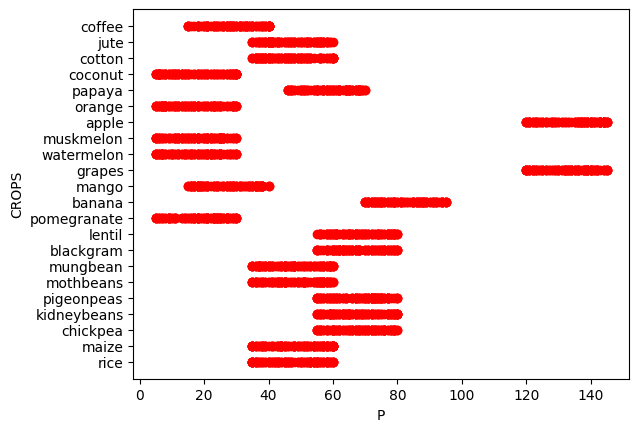

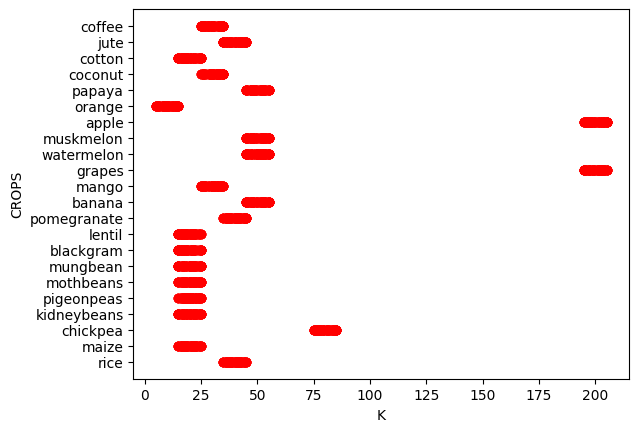

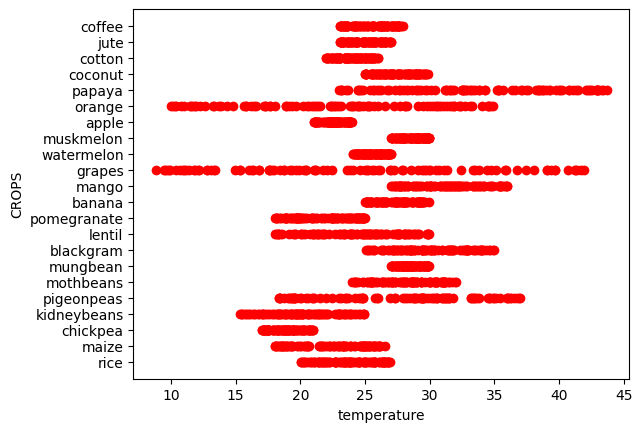

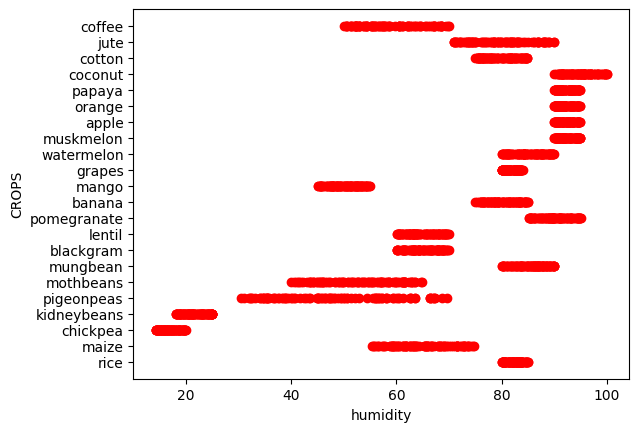

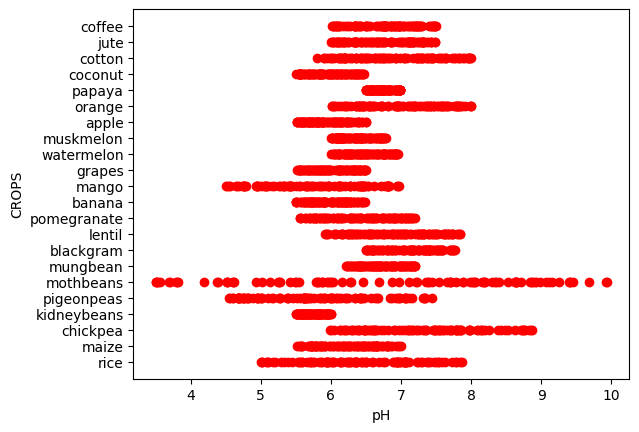

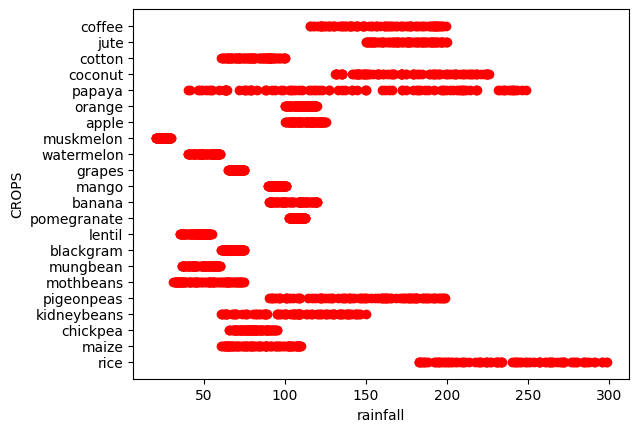

In [11]:
X=crop[['N', 'P', 'K', 'temperature', 'humidity', 'pH', 'rainfall']]
Y=crop[['label']]

#scatter plot between dependent variable- LABEL & independent varibale-other columns left
for i in crop[['N', 'P', 'K', 'temperature', 'humidity', 'pH', 'rainfall']]:
  plt.scatter(crop[i],crop['label'],color='red')
  plt.xlabel(i)
  plt.ylabel("CROPS")
  plt.show()

# Looking for outliers

In [12]:
crop["ph"].plot(kind='box')

KeyError: 'ph'

<Axes: >

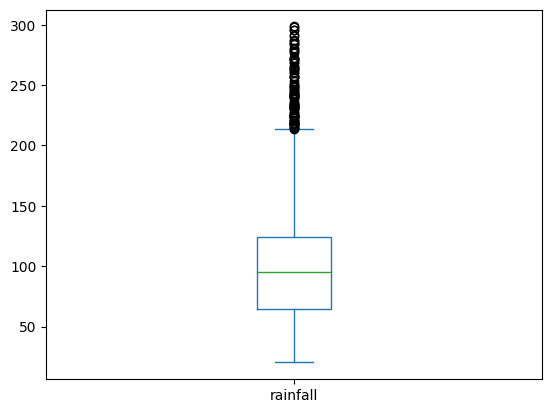

In [13]:
crop["rainfall"].plot(kind="box")

<Axes: >

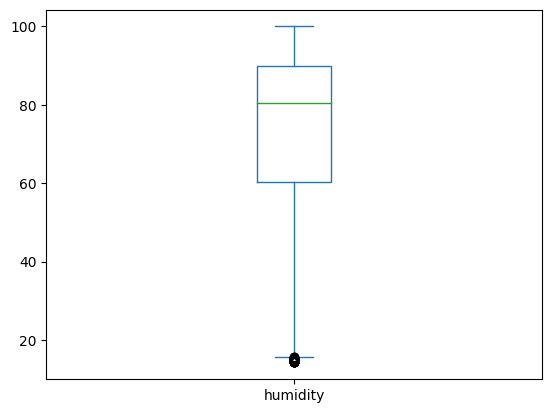

In [14]:
crop["humidity"].plot(kind="box")

<Axes: >

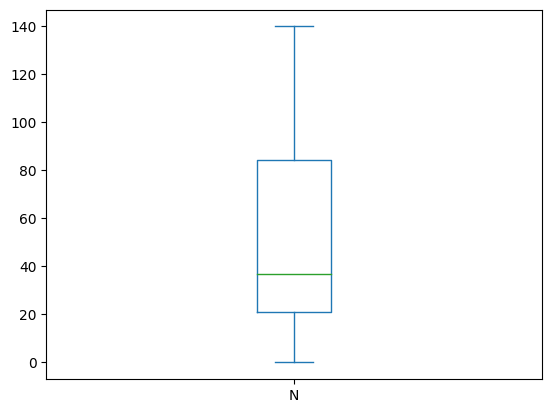

In [15]:
crop["N"].plot(kind='box')

<Axes: >

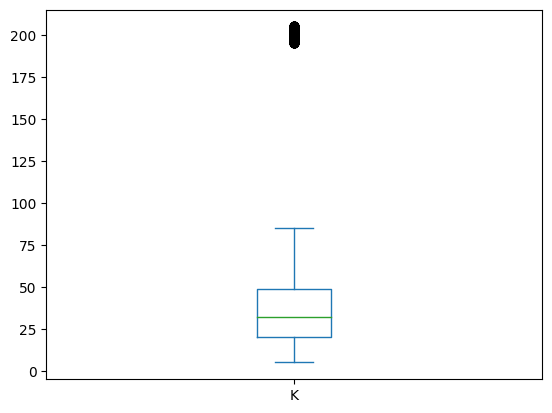

In [16]:
crop["K"].plot(kind='box')

<Axes: >

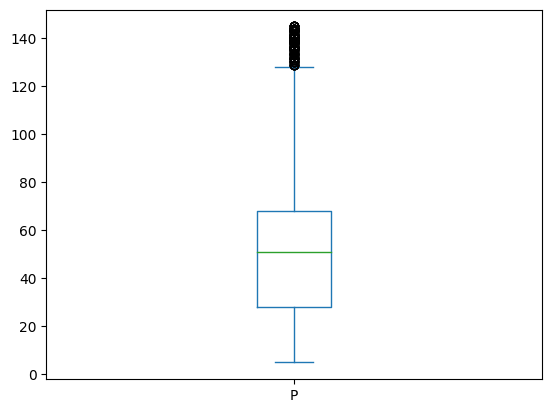

In [17]:
crop["P"].plot(kind='box')

## Removing Outliers
### Value of K has very large diffrence

In [18]:
df = crop.loc[crop["K"]>100,["label"]]
df["label"].unique()


array(['grapes', 'apple'], dtype=object)

In [19]:
df = crop.loc[crop["P"]>100,["label"]]
df["label"].unique()

array(['grapes', 'apple'], dtype=object)

In [22]:
Q1 = crop.quantile(0.25)
Q3 = crop.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
crop_filtered = crop[~((crop < lower_bound) | (crop > upper_bound)).any(axis=1)]

<ipython-input-22-b7efdcae2eab>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = crop.quantile(0.25)
<ipython-input-22-b7efdcae2eab>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = crop.quantile(0.75)
<ipython-input-22-b7efdcae2eab>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  crop_filtered = crop[~((crop < lower_bound) | (crop > upper_bound)).any(axis=1)]


In [23]:
crop_filtered

,N,P,K,temperature,humidity,pH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Encoding the target variable and mapping the corresponding values

In [24]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
crop_filtered["crop_name"]=crop_filtered["label"]
crop_filtered.label = l.fit_transform(crop_filtered.label)
crop_filtered

<ipython-input-24-726efc0f8a9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered["crop_name"]=crop_filtered["label"]
<ipython-input-24-726efc0f8a9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.label = l.fit_transform(crop_filtered.label)


,N,P,K,temperature,humidity,pH,rainfall,label,crop_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,18,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,18,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,18,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,18,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,4,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,4,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,4,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,4,coffee


In [30]:
dict_crop_name = {
    0: "Banana", 1: "Blackgram" , 2: "Chikpea" , 3: "Coconut" , 4: "Coffee" , 5 : "Cotton" ,
    6 : "Jute" , 7: "Kidney Beans" , 8: "Lentil" , 9: "Maize", 10: " Mango",11: "Moth Beans" ,12: "Mung Beans" ,13:"Musk Melons" ,
    14 : "Orange" ,15: "Papaya" , 16: "Pigeon Peas",17: "Pomegranate",18:"Rice",19:"Watermelon",20: "Apple"}

In [31]:
dict_crop_name

{0: 'Banana',
 1: 'Blackgram',
 2: 'Chikpea',
 3: 'Coconut',
 4: 'Coffee',
 5: 'Cotton',
 6: 'Jute',
 7: 'Kidney Beans',
 8: 'Lentil',
 9: 'Maize',
 10: ' Mango',
 11: 'Moth Beans',
 12: 'Mung Beans',
 13: 'Musk Melons',
 14: 'Orange',
 15: 'Papaya',
 16: 'Pigeon Peas',
 17: 'Pomegranate',
 18: 'Rice',
 19: 'Watermelon',
 20: 'Apple'}

## Structuring DF

In [32]:
crop_filtered.sort_values(by="label",ascending=True,inplace=True)

<ipython-input-32-e2b3b7c5b94b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.sort_values(by="label",ascending=True,inplace=True)


In [33]:
crop_filtered.reset_index(inplace=True)

In [34]:
crop_filtered.drop('index',axis = 1,inplace=True)
crop_filtered

<ipython-input-34-17df59febda3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_filtered.drop('index',axis = 1,inplace=True)


,N,P,K,temperature,humidity,pH,rainfall,label,crop_name
0,116,71,47,27.572781,82.063888,6.435786,91.342765,0,banana
1,89,85,55,26.671983,76.485417,6.275385,91.733586,0,banana
2,82,75,55,27.345851,78.487384,6.281070,92.155243,0,banana
3,110,71,54,28.672089,82.207936,5.725419,94.379875,0,banana
4,92,81,52,28.010680,76.528081,5.891414,103.704078,0,banana
...,...,...,...,...,...,...,...,...,...
1763,119,19,55,25.187800,83.446217,6.818261,46.874209,19,watermelon
1764,119,25,51,26.473302,80.922544,6.283818,53.657426,19,watermelon
1765,97,8,52,24.910323,86.971900,6.237862,49.485757,19,watermelon
1766,118,13,54,24.413119,89.815740,6.039585,44.078435,19,watermelon


## Splitting Data

In [35]:
X = crop_filtered.drop(['label','crop_name'],axis=1)
y = crop_filtered['label']
y_names = crop_filtered['crop_name']

In [36]:
X.head()

,N,P,K,temperature,humidity,pH,rainfall
0,116,71,47,27.572781,82.063888,6.435786,91.342765
1,89,85,55,26.671983,76.485417,6.275385,91.733586
2,82,75,55,27.345851,78.487384,6.281070,92.155243
3,110,71,54,28.672089,82.207936,5.725419,94.379875
4,92,81,52,28.010680,76.528081,5.891414,103.704078


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [39]:
Scaler = MinMaxScaler()
X_train_normalized = Scaler.fit_transform(X_train)
X_test_normalized = Scaler.transform(X_test)

## KNN

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_normalized,y_train)
KNN_SCORE = KNN.score(X_test_normalized,y_test)

In [41]:
KNN_SCORE


0.9774011299435028

In [42]:
y_pred1 = KNN.predict(X_test_normalized)
accuracy_score(y_test,y_pred1)

0.9774011299435028

In [43]:
X_train_normalized.shape

(1414, 7)

In [44]:
y_train.shape

(1414,)

In [46]:
features = crop[['N', 'P','K','temperature', 'humidity', 'pH', 'rainfall']]
target = crop['label']
#features = crop[['temperature', 'humidity', 'ph', 'rainfall']]
labels = crop['label']
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []
#Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

In [51]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import cross_val_score

'''rf_classifier = rf(n_estimators=100, random_state=42)
rf_classifier.fit(Xtrain,Ytrain)

predicted_values = rf_classifier.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest')'''


clf = rf(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())

classifier = clf.fit(X,y)
predictions = classifier.predict(Xtest)
print(predictions)

print("Random Forest's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

0.9881211888414079
[13 19 15 15 15 10 15 11 12  8  1  3 17  6  3 17 15  9 15 13  4 15 14 15
  2  6 12 14 16 18 17 11  6  8  6  1  6  2  2  7 15 10  1  9 12  9 16  3
 13  9  1  4  0 12  4  7  5 15  0  1 19  3  8 14 15 16 14 18 13 16 13  3
  6  0  1 15  0  5 19 14  4  2 18 11 14 10  4 11  1 17  9 11  5 15 16 11
  7  4  1  8  3 18 14 13 19  7 19  0 16 11  0  6  5 17 16  2  9  3 17 18
 16  0  1  3  2  1  3  9  0 11  0  7 17  2  3 14 16  0  0 15  7 13 12 11
  3  9 15  3  7 11 12  8 19 12 16 16 16  7  9  6  2 15 14  5 18  3  0  8
 19  0  0  1 17  2  3  9  8  0 19  6  4  4  7  6 11  7  0  7  3 15 15 12
 10 17 19  7  9 15  1  2  0  0  0  5 18 17 12  0  6 12  9  2  2  2 15 18
  7 15  4  1  7 10 10  3 15 15  2 17  2 13 15 13 13 10 10  5  3 17  6 13
  4 15 11  9 10 13 16 12  4  0  3  5 16 18 15 17  4  2  5  6 10  0 15 15
  2 18 16 11 12  6 17  0 11  6  9  3  9  2  0 18  3  6 10 13 15  0 16  1
 14  2 19  0 15  2  4 16 14 15  3 15 19 11 15  2 17  2 15  8 15 17  2 10
  2 17 19  7 12 13 19  7 13 10 1